In [2]:
import numpy as np
import pandas as pd
from util import (BOHR, read_mat, read_comp, get_iso, get_aniso, read_by_prompt, get_df_err, get_rmsre_3comp, get_relrmsd_3comp)
import itertools
import warnings
import basis_set_exchange as bse
from functools import partial

warnings.filterwarnings("ignore")
np.set_printoptions(8, suppress=True, linewidth=150)
pd.set_option('display.max_rows', None)
pd.set_option("display.precision", 3)
pd.set_option("float_format", '{:.3f}'.format)

In [3]:
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
%matplotlib inline

set_matplotlib_formats('svg')

In [4]:
tab_xc = pd.read_csv("benchmark.csv", index_col=[0], header=[0, 1])

In [5]:
mask_wft = tab_xc["information", "type"] == "WFT"
mask_lda = tab_xc["information", "type"] == "LDA"
mask_gga = tab_xc["information", "type"] == "GGA"
mask_mgga = tab_xc["information", "type"] == "mGGA"
mask_hyb_ex = ~pd.isna(tab_xc["information", "hybrid ex"])
mask_hyb_corr = ~pd.isna(tab_xc["information", "hybrid corr"])
mask_xdh = mask_hyb_corr & ~pd.isna(tab_xc["information", "XYG3-type"])
mask_bdh = mask_hyb_corr & pd.isna(tab_xc["information", "XYG3-type"])

In [6]:
mask_r3 = ~mask_wft & ~mask_hyb_ex
mask_r4 = mask_hyb_ex & ~mask_hyb_corr
mask_r5 = mask_hyb_corr

In [7]:
sum((mask_r3.sum(), mask_r4.sum(), mask_r5.sum()))

62

In [8]:
mask_r3.sum(), mask_r4.sum(), mask_r5.sum()

(9, 12, 41)

In [9]:
(mask_r3 & mask_lda).sum(), (mask_r3 & mask_gga).sum(), (mask_r3 & mask_mgga).sum()

(0, 4, 5)

In [10]:
(mask_r4 & mask_lda).sum(), (mask_r4 & mask_gga).sum(), (mask_r4 & mask_mgga).sum()

(0, 5, 7)

In [11]:
(mask_r5 & mask_xdh).sum(), (mask_r5 & mask_gga & mask_bdh).sum(), (mask_r5 & mask_mgga & mask_bdh).sum()

(10, 27, 4)

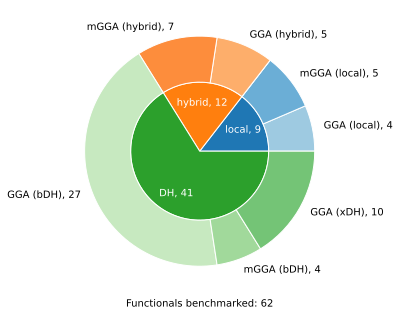

In [13]:
fig, ax = plt.subplots(figsize=(6, 4.5))
cm20 = plt.colormaps["tab20c"]

ax.pie(
    [9, 12, 41], labels=["local, 9", "hybrid, 12", "DH, 41"],
    radius=0.6,
    wedgeprops=dict(width=0.6, edgecolor='w'),
    labeldistance=0.7, textprops={"color": "w", "horizontalalignment": "center"})
ax.pie(
    [0, 4, 5, 0, 5, 7, 27, 4, 10],
    labels=[
        "",
        "GGA (local), 4",
        "mGGA (local), 5",
        "",
        "GGA (hybrid), 5",
        "mGGA (hybrid), 7",
        "GGA (bDH), 27",
        "mGGA (bDH), 4",
        "GGA (xDH), 10",],
    radius=1,
    colors=cm20([3, 2, 1, 7, 6, 5, 11, 10, 9]),
    wedgeprops=dict(width=0.4, edgecolor='w'))
ax.set_xlabel("Functionals benchmarked: 62")
fig.tight_layout()
fig.savefig("../pol-functionals-distribution.pdf", transparent=True)

In [12]:
# xc information
tab_xc = pd.read_csv("raw_data/functionals.csv", index_col=[0])
tab_xc.year = tab_xc.year.fillna(0).astype("int32")

In [13]:
set(tab_xc[~tab_xc["hybrid corr"].isna()].index) - set(mask_hyb_corr[mask_hyb_corr].index)

{'DSD-PBEB95-D3BJ', 'PWPB95-D3Zero', 'ωB97X-2-LP'}